Reading given Data and Assigining Columns to the data

In [26]:
# import necessary packages for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv("po1_data.txt")
df.columns = ["Subject identifier","Jitter-%","Jitter-Microseconds",
              "Jitter-r.a.p","Jitter-p.p.q.5",
              "Jitter-d.d.p","Shimmer-%","Shimmer-DB","Shimmer-a.p.q.3",
              "Shimmer-a.p.q.5","Shimmer-a.p.q.11","Shimmer-d.d.a",
              "Harmonicity-autocorrelation","Harmonicity-Harmonic to noise"
              ,"Harmonicity-Harmonic to Noise", "Pitch-Median", "Pitch-Mean"
              ,"Pitch-S.D","Pitch-Minimum","Pitch-Maximum","Pulse-Pulses",
              "Pulse-Periods","Pulse-Mean","Pulse-S.D","Voice-Fraction","Voice-Number","Voice-Degree",
              "UPDRS","PD indicator"
    
             ]
df.head()

,Subject identifier,Jitter-%,Jitter-Microseconds,Jitter-r.a.p,Jitter-p.p.q.5,Jitter-d.d.p,Shimmer-%,Shimmer-DB,Shimmer-a.p.q.3,Shimmer-a.p.q.5,...,Pitch-Maximum,Pulse-Pulses,Pulse-Periods,Pulse-Mean,Pulse-S.D,Voice-Fraction,Voice-Number,Voice-Degree,UPDRS,PD indicator
0,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
1,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
2,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
3,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
4,1,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,...,202.812,74,73,0.005118,0.000187,23.214,0,0.000,23,1


Keeping only Required Datas

In [27]:
# Keeping only 26 necessary datas for further analysis

features = df.drop(["Subject identifier", "UPDRS", "PD indicator"], axis=1)
label = df["PD indicator"]
dataset = pd.concat([features, label], axis=1)
dataset.head()

,Jitter-%,Jitter-Microseconds,Jitter-r.a.p,Jitter-p.p.q.5,Jitter-d.d.p,Shimmer-%,Shimmer-DB,Shimmer-a.p.q.3,Shimmer-a.p.q.5,Shimmer-a.p.q.11,...,Pitch-Minimum,Pitch-Maximum,Pulse-Pulses,Pulse-Periods,Pulse-Mean,Pulse-S.D,Voice-Fraction,Voice-Number,Voice-Degree,PD indicator
0,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,1
1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,1
2,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,1
3,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,1
4,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,9.199,...,186.593,202.812,74,73,0.005118,0.000187,23.214,0,0.000,1


Separating PD and Non-PD group, and Statistics for PD Group

In [35]:
# Separate data for PD and non-PD groups
# PD groups = 1, and Non-PD (Healthy) = 0
pd_data = dataset[dataset['PD indicator'] == 1]  # Since PD label is 1
healthy_data = dataset[dataset['PD indicator'] == 0]

pd_stats = pd_data.describe()
healthy_stats = healthy_data.describe()

print("Parkinson Disease's Statistics:\n")
pd_stats.head()

Parkinson Disease's Statistics:



,Jitter-%,Jitter-Microseconds,Jitter-r.a.p,Jitter-p.p.q.5,Jitter-d.d.p,Shimmer-%,Shimmer-DB,Shimmer-a.p.q.3,Shimmer-a.p.q.5,Shimmer-a.p.q.11,...,Pitch-Minimum,Pitch-Maximum,Pulse-Pulses,Pulse-Periods,Pulse-Mean,Pulse-S.D,Voice-Fraction,Voice-Number,Voice-Degree,PD indicator
count,519.000000,519.000000,519.00000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,...,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.0
mean,2.854252,0.000188,1.35674,1.475903,4.070214,12.976704,1.207135,5.647055,7.880583,13.107382,...,131.737957,218.000007,115.813102,112.915222,0.006701,0.000801,25.172592,1.007707,10.478424,1.0
std,1.681113,0.000113,0.91818,1.019948,2.754580,4.710630,0.365432,2.486535,3.514261,6.328493,...,42.932069,109.482146,178.694055,178.532436,0.001869,0.000737,20.651862,1.470409,13.768271,0.0
min,0.195000,0.000010,0.06200,0.091000,0.185000,2.171000,0.229000,0.565000,1.025000,0.517000,...,67.957000,85.541000,0.000000,0.000000,0.002211,0.000055,0.000000,0.000000,0.000000,1.0
25%,1.717500,0.000105,0.75250,0.802500,2.257500,10.156500,1.000000,3.989000,5.474000,8.984500,...,99.706500,141.431000,42.500000,41.000000,0.005070,0.000383,5.796000,0.000000,0.000000,1.0


Statistics for Non-PD Group 

In [36]:
print("Healthy's Statistics:\n")
healthy_stats.head()

Healthy's Statistics:



,Jitter-%,Jitter-Microseconds,Jitter-r.a.p,Jitter-p.p.q.5,Jitter-d.d.p,Shimmer-%,Shimmer-DB,Shimmer-a.p.q.3,Shimmer-a.p.q.5,Shimmer-a.p.q.11,...,Pitch-Minimum,Pitch-Maximum,Pulse-Pulses,Pulse-Periods,Pulse-Mean,Pulse-S.D,Voice-Fraction,Voice-Number,Voice-Degree,PD indicator
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,...,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.0
mean,2.507421,0.000153,1.138244,1.222062,3.414746,12.869006,1.183479,5.754319,8.092812,11.335434,...,137.318069,251.810481,103.590385,98.934615,0.006393,0.000885,30.241529,1.263462,14.281812,0.0
std,1.831170,0.000096,1.027124,1.234842,3.081448,6.108741,0.468361,3.467099,5.877320,5.555173,...,50.772821,130.511785,114.500269,113.041041,0.001872,0.000708,20.994251,1.739768,16.231924,0.0
min,0.190000,0.000006,0.084000,0.081000,0.252000,1.185000,0.103000,0.496000,0.708000,0.982000,...,70.502000,100.010000,5.000000,4.000000,0.002039,0.000057,0.000000,0.000000,0.000000,0.0
25%,1.381750,0.000087,0.528000,0.578250,1.584000,8.768000,0.887000,3.486500,4.820000,7.504250,...,101.172500,148.153000,42.750000,40.000000,0.005035,0.000428,11.111000,0.000000,0.000000,0.0


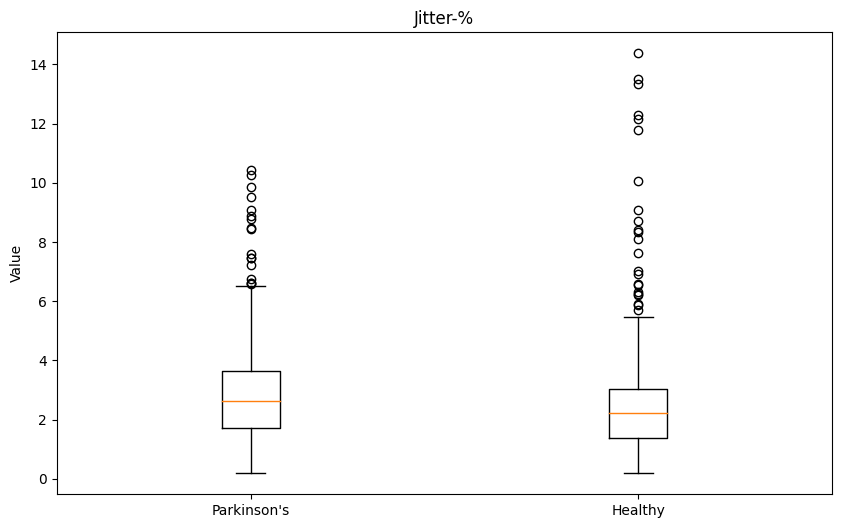

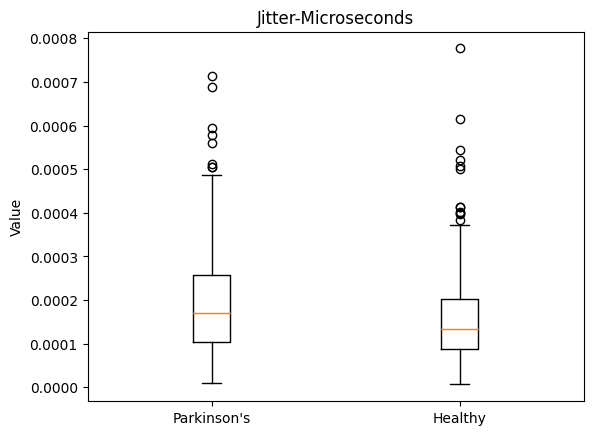

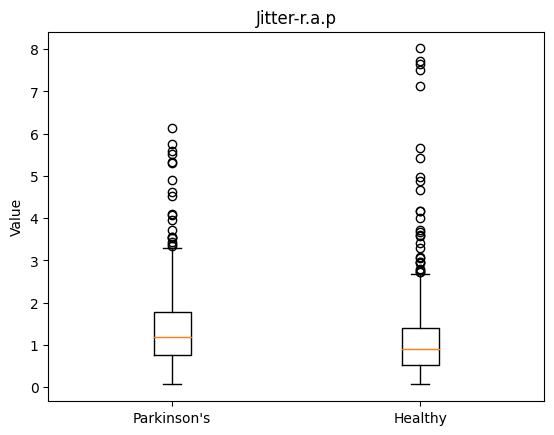

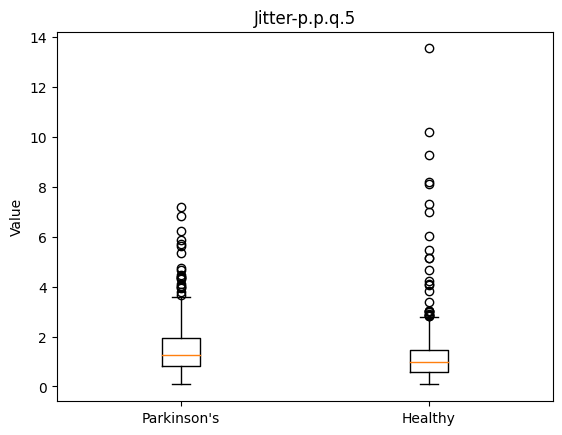

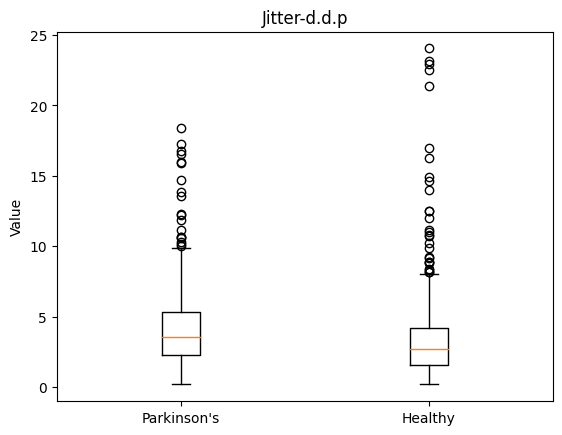

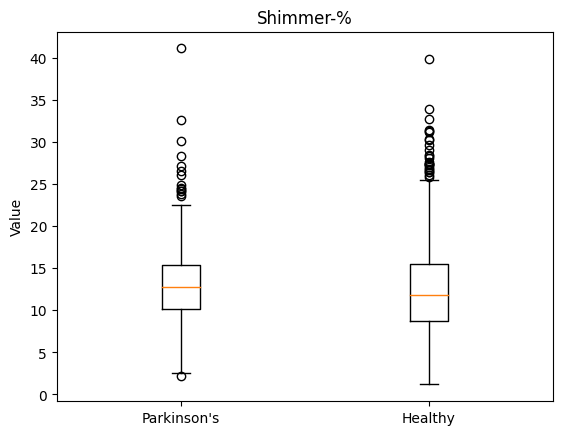

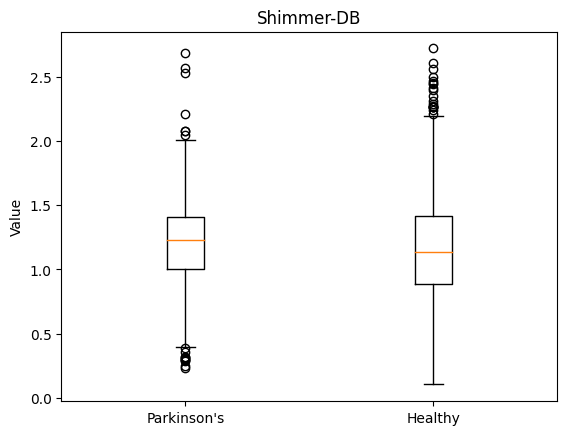

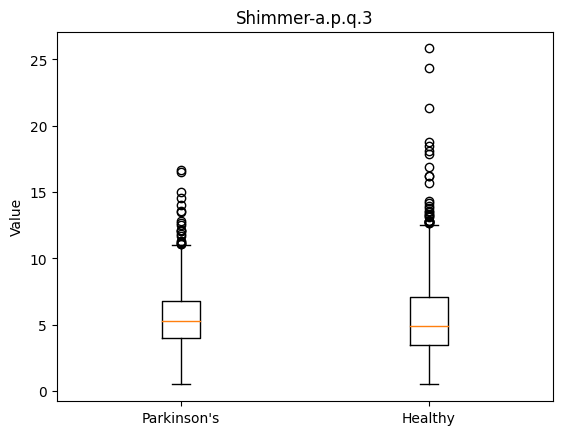

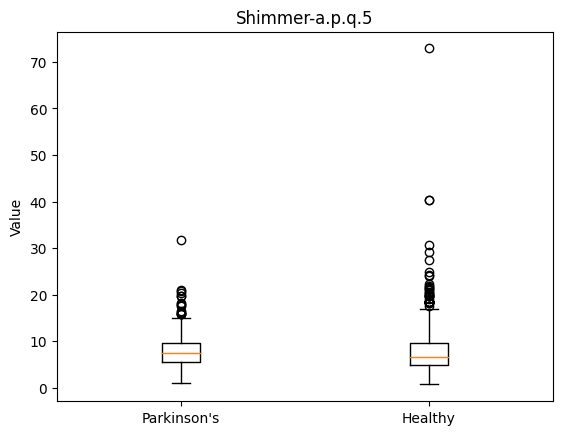

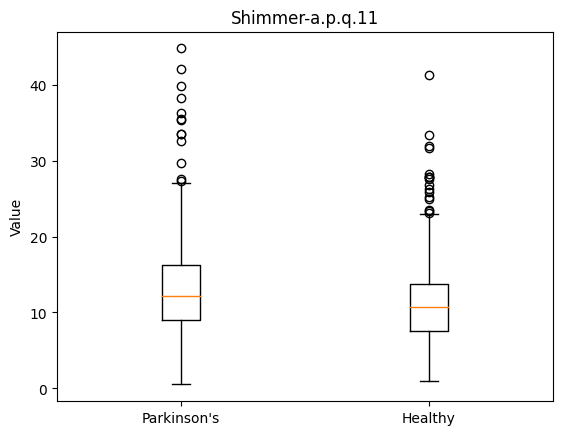

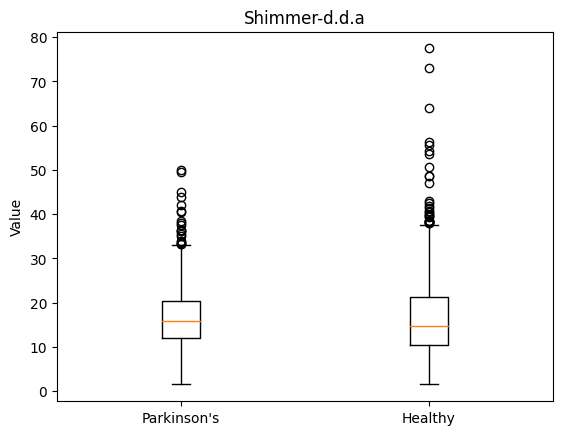

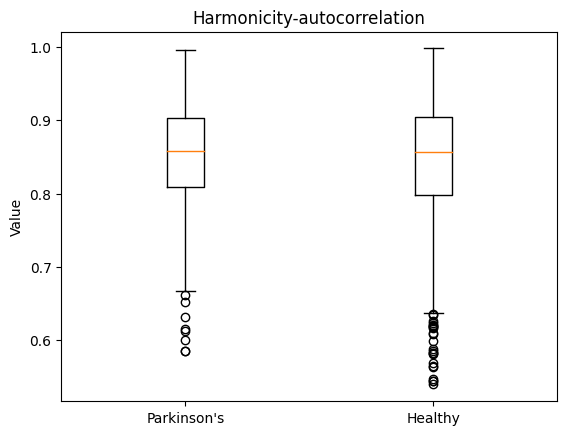

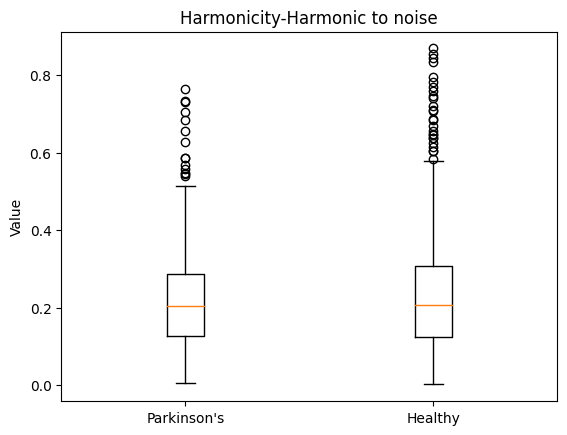

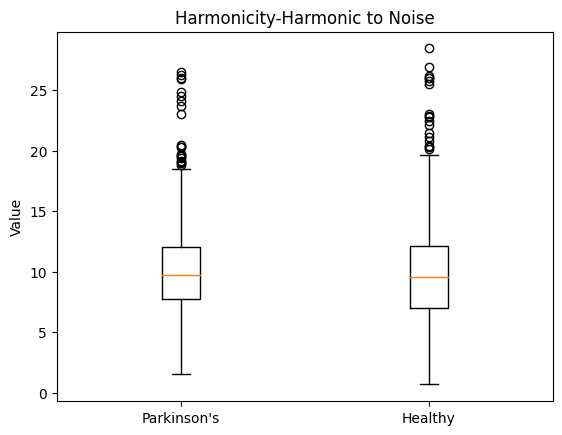

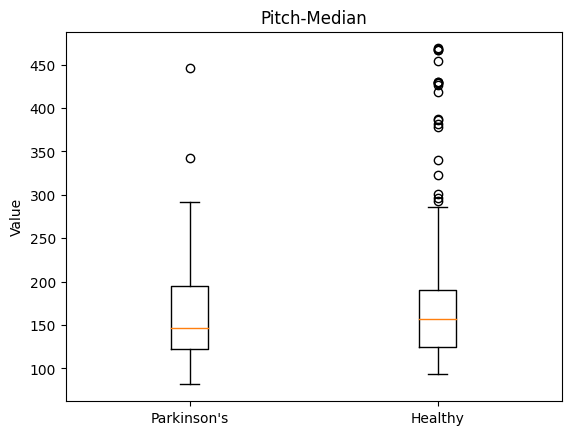

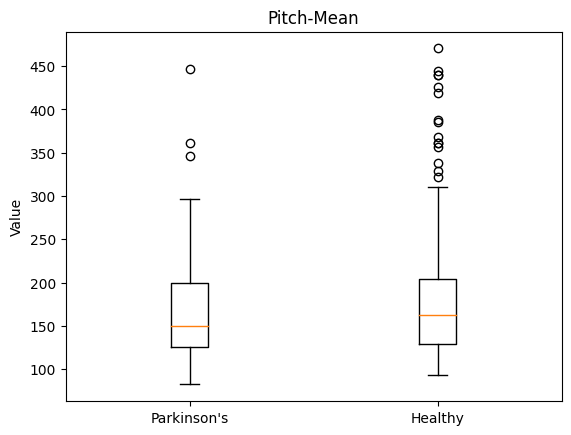

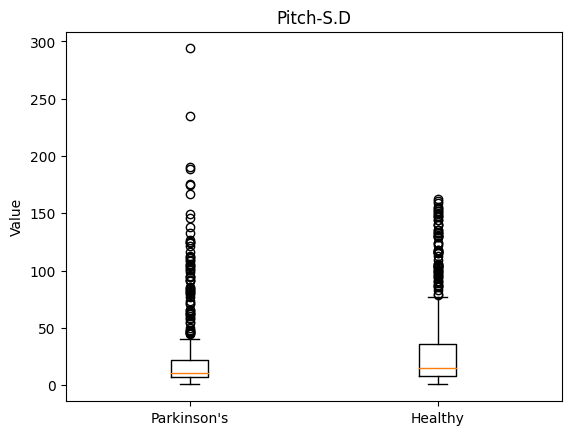

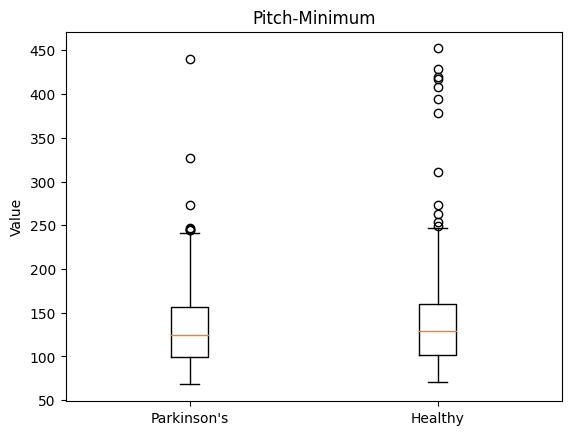

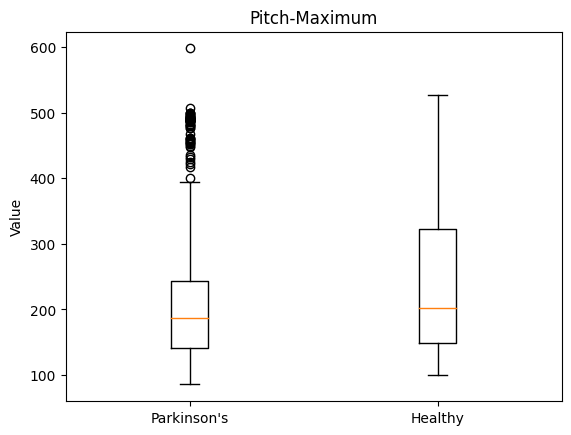

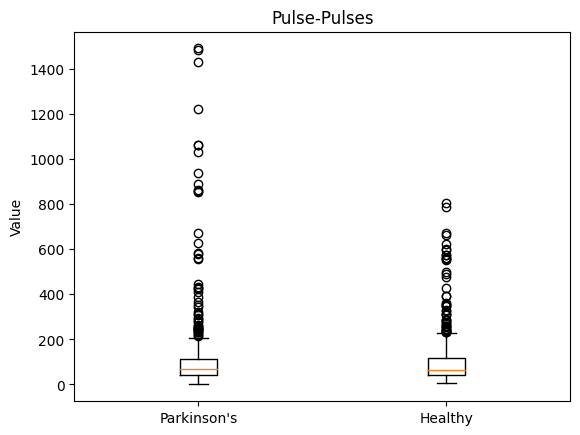

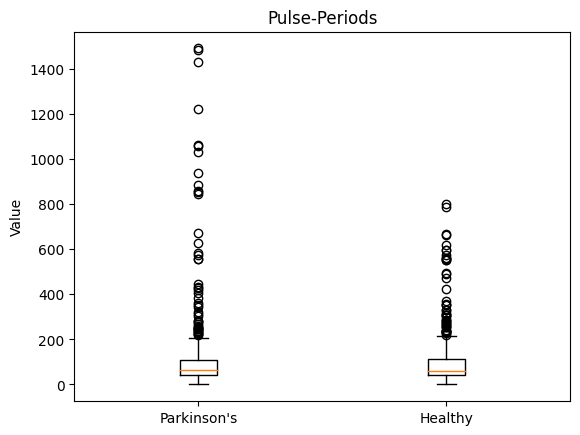

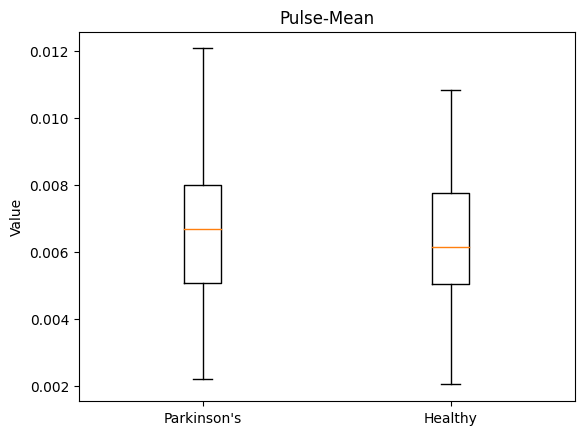

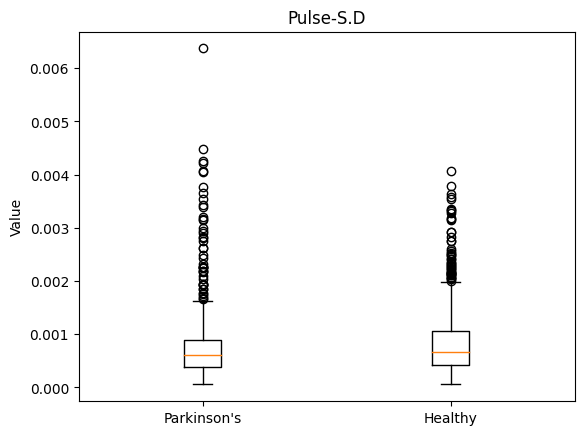

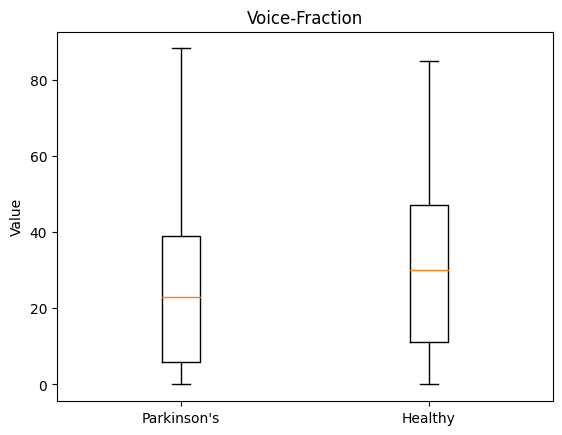

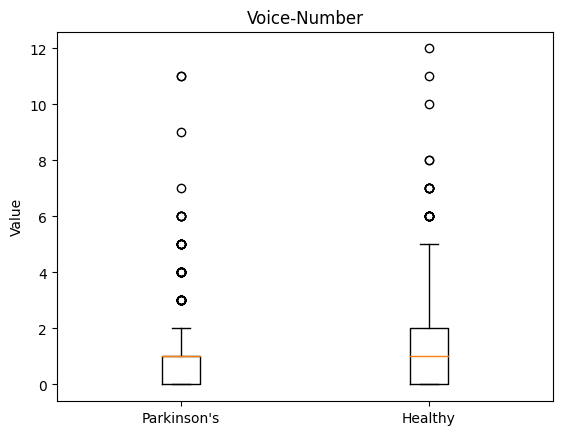

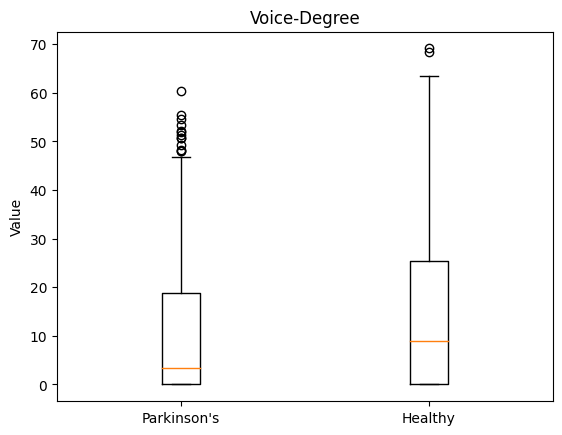

In [41]:
plt.figure(figsize=(10, 6))

for column in features.columns:
    plt.boxplot([pd_data[column], healthy_data[column]], labels=['Parkinson\'s', 'Healthy'])
    plt.title(column)
    plt.ylabel("Value")
    plt.savefig(f'{column}.png')
    plt.show()

Performing T-Test for Selected Dataset

In [53]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Perform t-tests for each feature
significant_features = []

for feature_idx in range(1, dataset.shape[1] - 2):  # Exclude ID, Score, and Classification columns
    pd_feature_values = pd_data.iloc[:, feature_idx]
    non_pd_feature_values = non_pd_data.iloc[:, feature_idx]

    t_statistic, p_value = ttest_ind(pd_feature_values, non_pd_feature_values)

    if p_value < 0.05:
        mean_difference = np.mean(pd_feature_values) - np.mean(non_pd_feature_values)
        pooled_std = np.sqrt((np.std(pd_feature_values, ddof=1) ** 2 + np.std(non_pd_feature_values, ddof=1) ** 2) / 2)

        significant_features.append((feature_idx))

# Print significant features
for feature_idx in significant_features:
    print("Significant:", {feature_idx})


Significant: {1}
Significant: {2}
Significant: {3}
Significant: {4}
Significant: {9}
Significant: {11}
Significant: {12}
Significant: {14}
Significant: {15}
Significant: {16}
Significant: {18}
Significant: {21}
Significant: {23}
Significant: {24}


Principle Component Analysis for Dimensionality Reduction

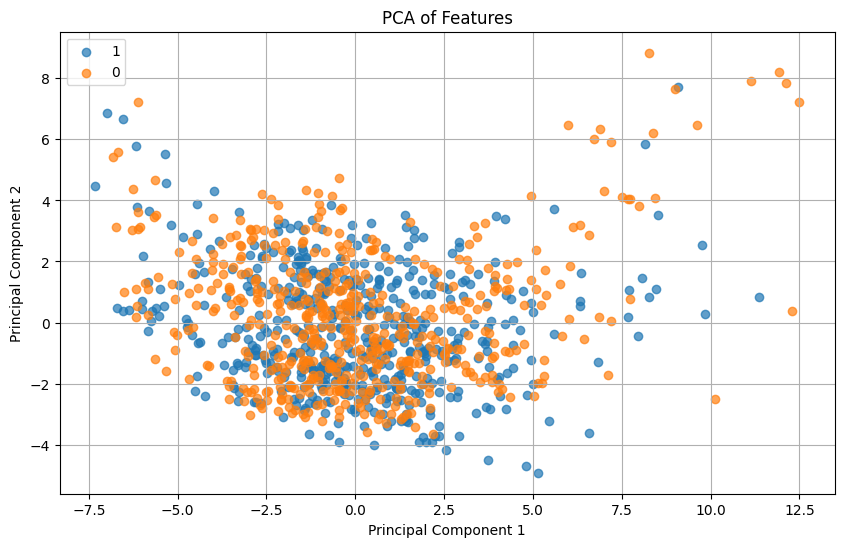

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif


features = dataset.iloc[:, 1:-2]  # Exclude ID and last 2 columns (Score and Classification)
target = dataset.iloc[:, -1]  # Classification column


# selected_features = [19, 17, 10, 24, 15]
# features_subset = dataset.iloc[:, selected_features]
# features_scaled = scaler.fit_transform(features_subset)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# features_scaled = scaler.fit_transform(features_subset)

# Perform PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

# Create a DataFrame for the reduced features and target
pca_df = pd.DataFrame(data=features_2d, columns=['PC1', 'PC2'])
pca_df['Classification'] = target

# Plot the PCA results with different colors for each classification
plt.figure(figsize=(10, 6))
classes = pca_df['Classification'].unique()
for class_type in classes:
    plt.scatter(pca_df[pca_df['Classification'] == class_type]['PC1'],
                pca_df[pca_df['Classification'] == class_type]['PC2'],
                label=class_type, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features')
plt.legend()
plt.grid()
plt.show()

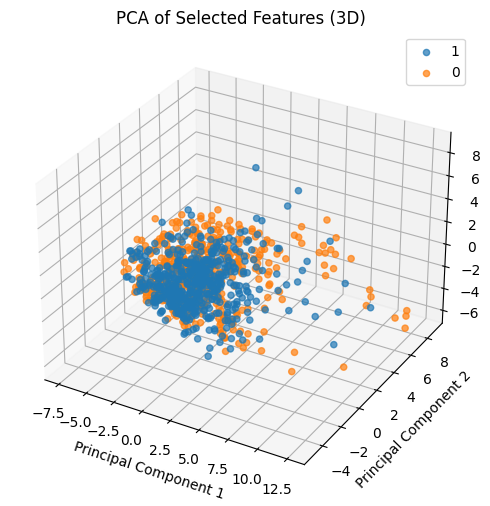

In [55]:
#PCA 3D

pca = PCA(n_components=3)
features_3d = pca.fit_transform(features_scaled)

# Create a DataFrame for the reduced features and target
pca_df = pd.DataFrame(data=features_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df['Classification'] = target

# Plot the PCA results in 3D with different colors for each classification
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
classes = pca_df['Classification'].unique()
for class_type in classes:
    ax.scatter(pca_df[pca_df['Classification'] == class_type]['PC1'],
               pca_df[pca_df['Classification'] == class_type]['PC2'],
               pca_df[pca_df['Classification'] == class_type]['PC3'],
               label=class_type, alpha=0.7)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Selected Features (3D)')
ax.legend()
plt.show()